# Diagramme und Charts

Zum Leben eines Datenanalysten gehört Visualisierung und bei der Visualisierung in Python sind die Bibliotheken Matplotlib und Seaborn nicht wegzudenken. Diesen werden wir auch im Modul Datenvisualisierung später begegnen. Doch für unsere aktuelle Arbeit würden wir auch jetzt schon gerne vorzeigbare Plots produzieren.

Zum Glück hat Pandas die wichtigsten Dinge dafür bereits an Bord, denn Pandas bringt (eingeschränktere) Funktionalitäten mit, die auf Matplotlib aufbauen! 
Der Vorteil: Sie sind super leicht zu nutzen und können direkt am Dataframe oder einer Pandas Series aufgerufen werden!
Im Folgenden schauen wir uns das für ein paar klassische Arten von Plots an und nehmen hier und da auch eine kleine
designbezogene Einstellung vor.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import ylabel, colormaps
from openpyxl.styles.builtins import title

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## Das Liniendiagramm (lineplot)

In [4]:
dow_jones = sns.load_dataset('dowjones')
dow_jones.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


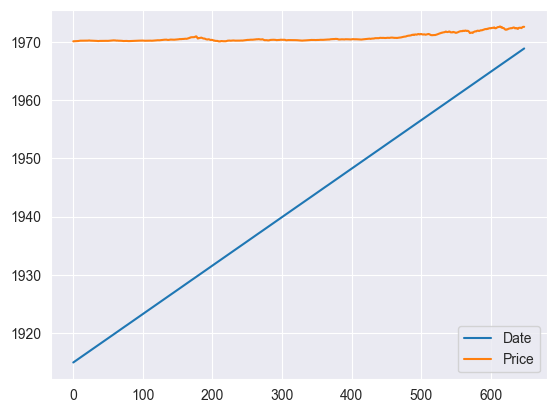

In [5]:
# So nicht!
# Als x-Achse wird nicht die Date-Spalte, sondern der Index genutzt!
dow_jones.plot();

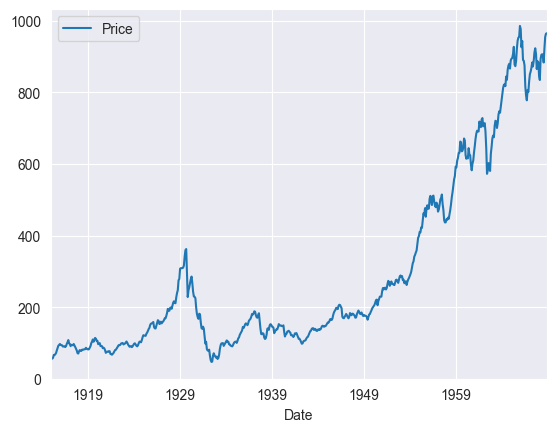

In [6]:
# So ist besser:
dow_jones.plot(x='Date', y='Price');

In [6]:
# Oder den Index ändern und dann plotten:
dow_jones = dow_jones.set_index('Date')

In [7]:
dow_jones.head()

,Price
Date,
1914-12-01,55.00
1915-01-01,56.55
1915-02-01,56.00
1915-03-01,58.30
1915-04-01,66.45


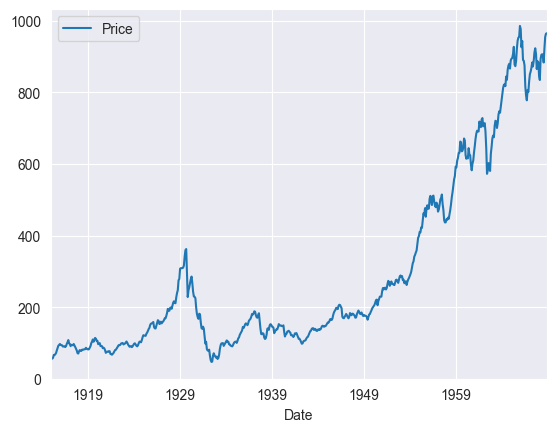

In [8]:
# Der Index ist nun Datum und wird automatisch genommen:
dow_jones.plot();

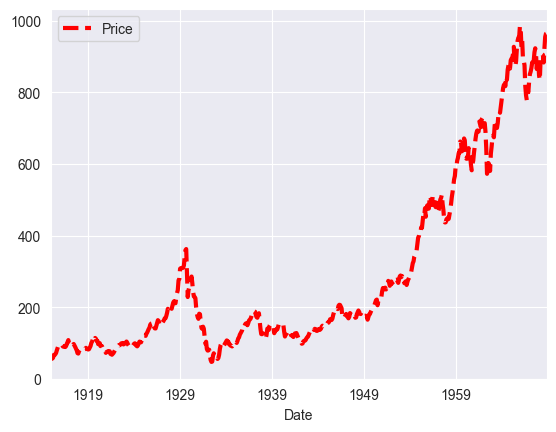

In [9]:
# Farbe ändern, Typ bestimmen (lineplot ist Standard!), Linienstil und -dicke:
dow_jones.plot(color='red', kind='line', ls='dashed', lw='3');

In [10]:
# Uns interessiert nur ein Ausschnitt? Kein Problem!
# Daten in Pandas mit pd.Timestamp anlegen:
start = pd.Timestamp(1929, 1, 1)
ende = pd.Timestamp(1956, 1, 1)

In [11]:
period_of_interest = dow_jones[(dow_jones.index >= start) & (dow_jones.index < ende)]

In [12]:
period_of_interest.index.max()

Timestamp('1955-12-01 00:00:00')

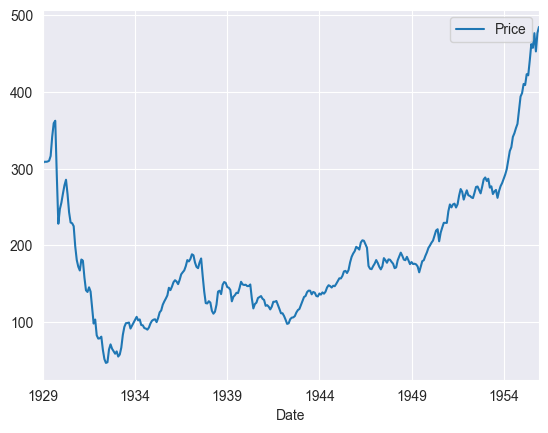

In [13]:
period_of_interest.plot();

Aufgabe 1:
Erzeuge eine Liste squares mit den Quadratzahlen von 0 bis 10.
Stelle aus dieser Liste eine Pandas-Series namens squares_series her.
Plotte nun die Series als Lineplot.
Mache die Linienfarbe bitte grün und setze die Liniendicke auf 5.

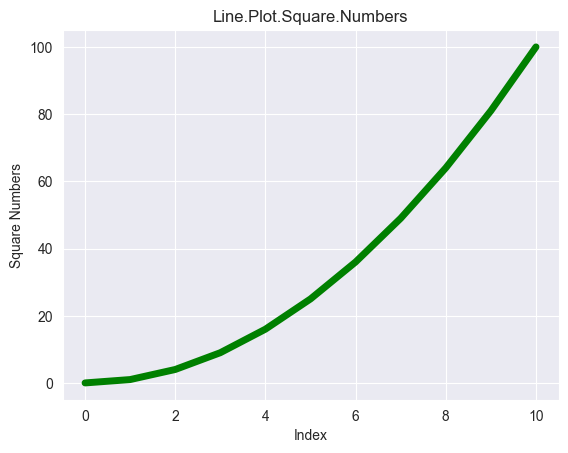

In [23]:
square_num = [x**2 for x in range(11)]
squares_series = pd.Series(square_num, name='Squares')

squares_series.plot(color='green',
                    lw='5',
                    title='Line.Plot.Square.Numbers',
                    xlabel='Index',
                    ylabel='Square Numbers'
                    );

In [14]:
# Flugdaten laden:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


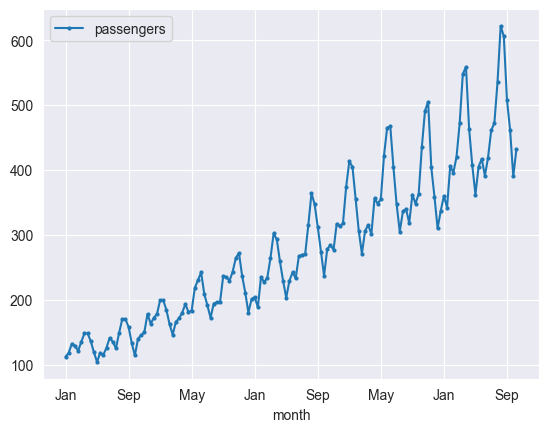

In [15]:
flights.plot(x='month', 
             y='passengers',
             marker='o',
             markersize=2
             );

In [16]:
# Welche Jahre gibt es?
flights['year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

In [28]:
# Quizfrage: Wie kriegen wir Passagiere pro Jahr hin?
pass_per_year = flights.groupby('year')['passengers'].sum()

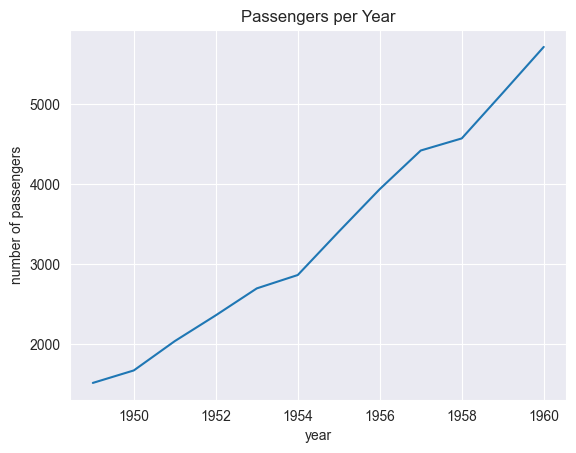

In [31]:
# Jahre als Liniendiagramm:
pass_per_year.plot(title='Passengers per Year',
                   xlabel='year',
                   ylabel='number of passengers',
                   );

## Das Säulendiagramm (barplot)

In [30]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
# Wie war die Klassenverteilung auf der Titanic?
classes = titanic['class'].value_counts()
classes

class
Third     491
First     216
Second    184
Name: count, dtype: int64

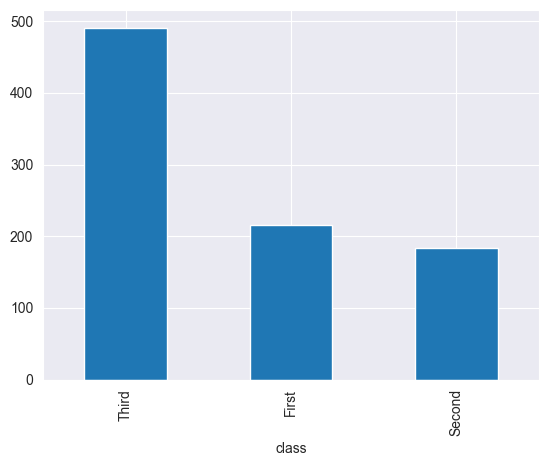

In [20]:
# Als Säulendiagramm
# Standardmäßig mit absteigenden Balken
classes.plot(kind='bar');

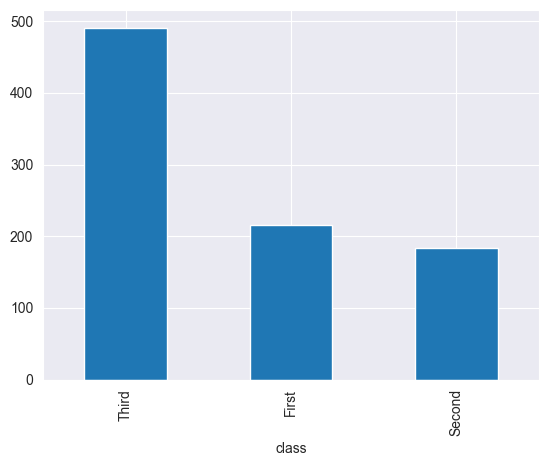

In [22]:
# Alternative Notation:
classes.plot.bar();

In [23]:
classes_order = titanic['class'].value_counts().reindex(['First', 'Second', 'Third'])
classes_order

class
First     216
Second    184
Third     491
Name: count, dtype: int64

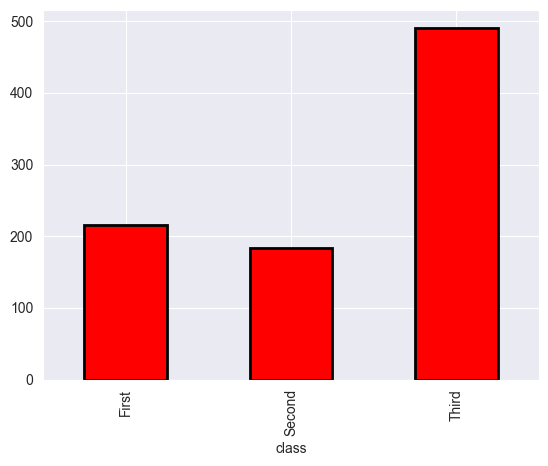

In [24]:
classes_order.plot(kind='bar', 
                   color='red', 
                   ec='black',
                   lw=2
                   );

Aufgabe 2:
Erstelle ein Balkendiagramm für den "alive"-Status der Passagiere.
Färbe die Balken orange ein und umgebe sie mit einer dicken violetten Linie (purple).
Bonus: Der erste Balken sollen die Überlebenden sein, der zweite Balken die Toten. Passe den Index an.

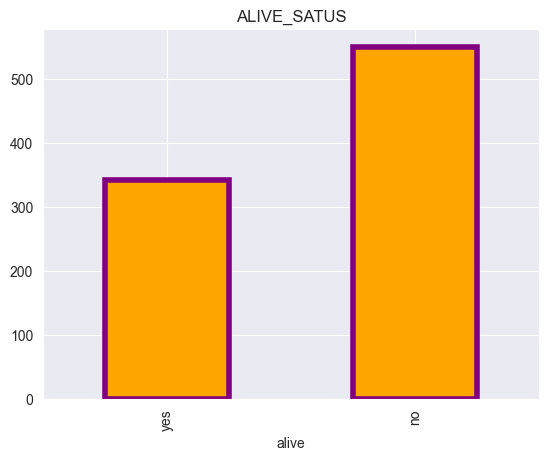

In [44]:
##############
## EXERCISE ##
##############

# create alive series
alive_stat = titanic['alive'].value_counts().reindex(['yes', 'no'])

# create BarPlot with Parameters
alive_stat.plot(title='ALIVE_SATUS', kind='bar', color='orange', ec='purple', lw=4);

## Das Histogramm (histplot)

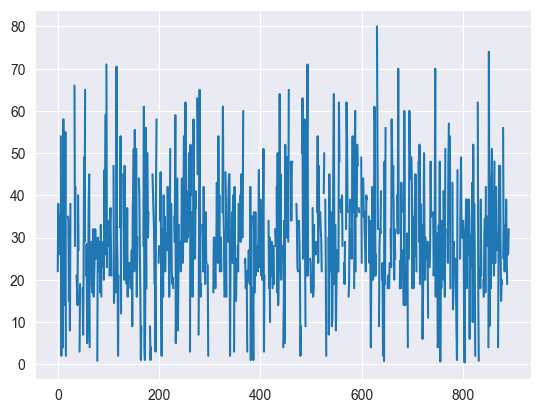

In [33]:
# Wie ist die Altersverteilung auf der Titanic gewesen?
# Linienplot wäre keine schöne und lesbare Lösung!
titanic['age'].plot();

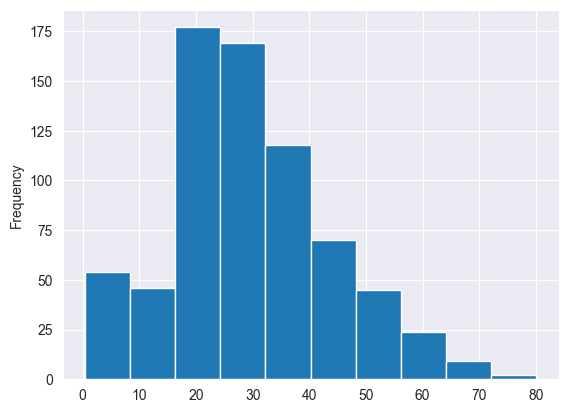

In [34]:
# Histogramm teilt Daten in eine vom Nutzer definierte Anzahl von bins ein
# Es entsteht ein Balkendiagramm mit den Counts von Altersangaben, die in diese bins gehören!
# Der Standard ist eine automatische Aufteilung in 10 bins:
titanic['age'].plot(kind='hist');

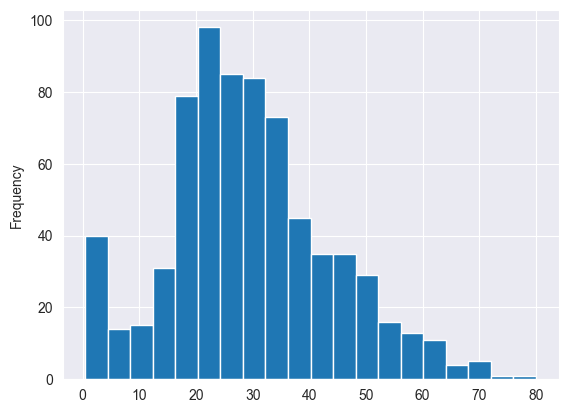

In [35]:
# Es geht aber feinkörniger:
titanic['age'].plot(kind='hist',
                    bins=20);

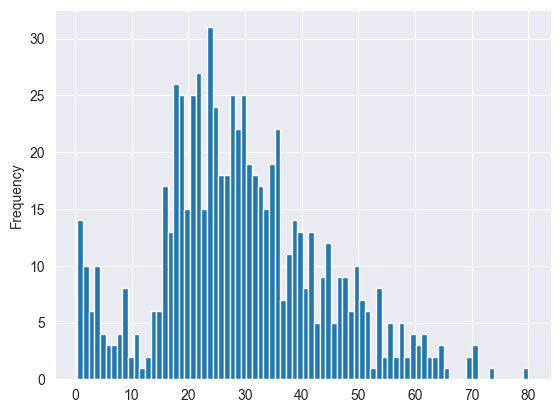

In [36]:
# Und feinkörniger:
titanic['age'].plot(kind='hist',
                    bins=80);

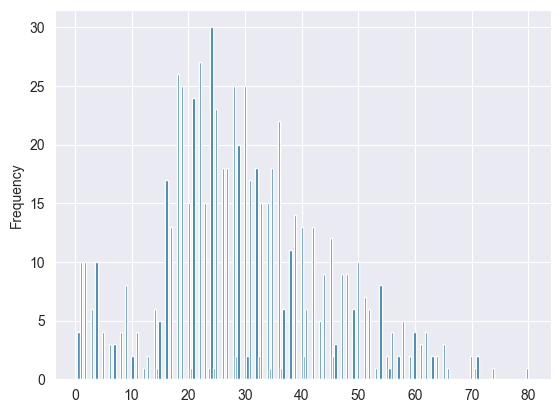

In [37]:
# Bis es zu feinkörnig ist.
# Was könnte der Hintergrund für dieses Verhalten sein?
titanic['age'].plot(kind='hist',
                    bins=200);

In [ ]:
# Die perfekte Anzahl von bins kann zwar nach Augenmaß ausgesucht werden.
# Aber es ist wichtig, sich bewusst zu halten, dass man damit auch Ergebnisse bewusst verfälschen kann.
# Mehr dazu im Statistik-Modul!

Aufgabe 3:
Erstelle ein Histogramm der Gewichtsverteilungen der Pinguine und 30 Balken.
Färbe die Balken grün ein.
Verleihe dem Diagramm den Titel: Häufigkeitsverteilung von Pinguinkörpermassen
Trage auf der x-Achse als Label auf: Masse (g)
Trage auf der y-Achse auf: Anzahl Pinguine

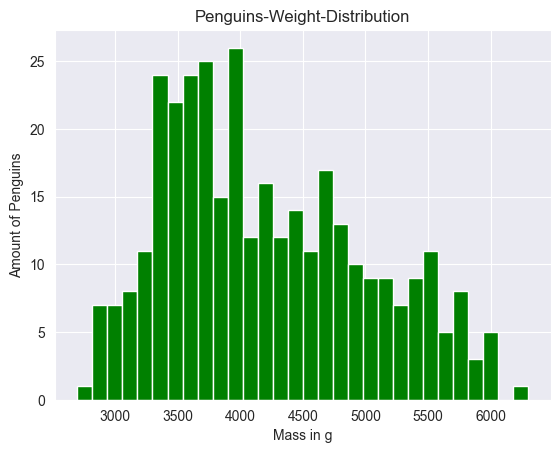

In [56]:
peng_df = sns.load_dataset('penguins')
pengu_weight_distribution = peng_df['body_mass_g'].plot(
    kind='hist',
    bins=30,
    color='green',
    title='Penguins-Weight-Distribution',
    ylabel='Amount of Penguins',
    xlabel='Mass in g'
)
pengu_weight_distribution;

## Das Tortendiagramm (pieplot)

In [49]:
# Wie wäre es mal mit dem Blick aufs Ganze?
# Welche Anteile am Pinguin-Kuchen machen die einzelnen Arten aus?
species_counts = peng_df['species'].value_counts()
species_counts

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

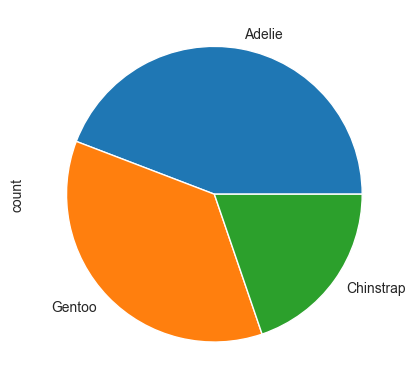

In [57]:
# Adelie dominiert ganz klar.
# Aber es fehlen noch die Prozentangaben...
species_counts.plot(kind='pie');

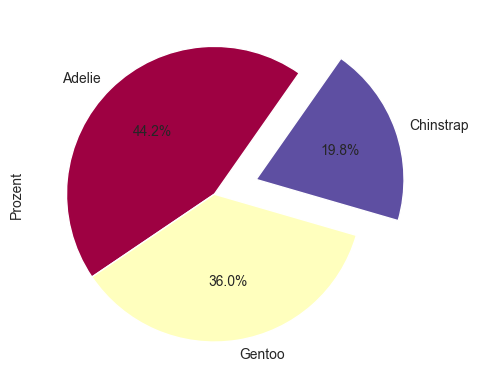

In [82]:
# Mit Prozentangaben UND zur "Verdeutlichung" herausgezogenem Chinstrap sowie etwas Rotation (gegen Uhrzeigersinn):
species_counts.plot(kind='pie',
                    explode=(0, 0, 0.3),
                    autopct='%1.1f%%',
                    startangle=55,
                    ylabel='Prozent',
                    cmap='Spectral'
                    );

Aufgabe 4:
Erstelle ein Tortendiagramm, das die Anteile der Klassen an der Menge aller Passagiere der Titanic darstellt.
Verleihe dem Diagramm den Titel: Passagiere nach Klassen
Auf der y-Achse soll 'Prozent' stehen.
Nimm eine Colormap, die dich anspricht und ziehe den Tortenteil mit der ersten Klasse heraus (rotiere dafür so weit,
bis du optisch zufrieden bist!)

In [75]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [83]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


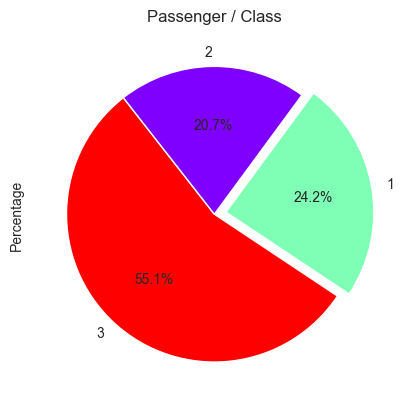

In [122]:
pass_per_class = titanic['pclass'].value_counts()
pclass_percentage = (pass_per_class / pass_per_class.sum()) * 100
pie_plot = pclass_percentage.plot(
    title='Passenger / Class',
    kind='pie',
    autopct='%1.1f%%',
    startangle=128,
    explode=[0, 0.08, 0],
    ylabel='Percentage',
    cmap='rainbow_r'
);

## Das Streudiagramm (scatterplot)

In [ ]:
# Mit einem Scatterplot schaut man sich den Zusammenhang einer Variable mit einer anderen an.
# Das Gewicht und die Flügellänge können ein Beispiel sein.
# Indem Pinguine als Punkte aufgetragen werden (Gewicht auf der x-Achse, Flügellänge y-Achse)
# entsteht eine Punktewolke bzw. ein Streudiagramm.
# Sieht man in dieser Wolke ein Muster, so ist das für die Datenanalyse ein gutes Zeichen
# und kann auf einen Zusammenhang hinweisen.
# Mehr dazu im Statistik-Modul!

In [ ]:
# Der Zusammenhang von Masse und Flügellänge als Streudiagramm:
peng_df.plot(kind='scatter',
             x='body_mass_g',
             y='flipper_length_mm',
             ec='black',
             color='orange',
             title='Verhältnis von Masse und Flügellänge von Pinguinen',
             xlabel='Körpermasse (g)',
             ylabel='Flügellänge (mm)'
             );

Aufgabe 5:
Erstelle ein Streudiagramm, das die Schnabellänge und Schnabelbreite von Pinguinen darstellt.
Designe es ganze nach deinem Geschmack! (Titel und Beschriftungen der Achsen müssen sein!)
Gibt es einen Zusammenhang zwischen den beiden Variablen?